In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# -------- Load data --------
with open("./data/hackathon_public.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data["circuits"])
df.head()
print(len(df))


36


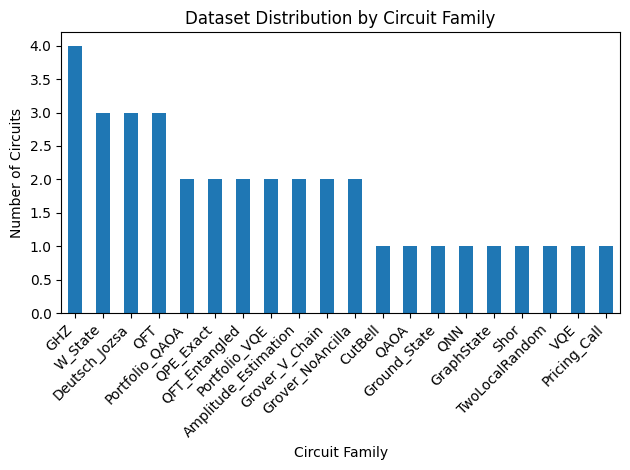

In [2]:
# -------- Plot 1: Count per family --------
plt.figure()
df["family"].value_counts().plot(kind="bar")
plt.xlabel("Circuit Family")
plt.ylabel("Number of Circuits")
plt.title("Dataset Distribution by Circuit Family")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

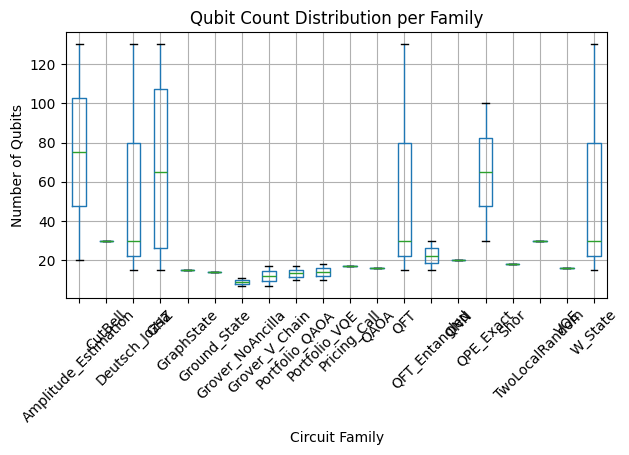

In [3]:
plt.figure()
df.boxplot(column="n_qubits", by="family", rot=45)
plt.xlabel("Circuit Family")
plt.ylabel("Number of Qubits")
plt.title("Qubit Count Distribution per Family")
plt.suptitle("")  # removes automatic pandas title
plt.tight_layout()
plt.show()

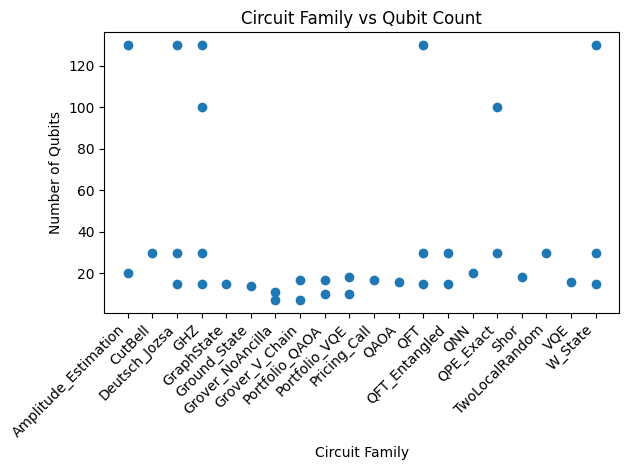

In [4]:
plt.figure()
family_codes = df["family"].astype("category").cat.codes
plt.scatter(family_codes, df["n_qubits"])

plt.xticks(
    ticks=range(len(df["family"].unique())),
    labels=df["family"].astype("category").cat.categories,
    rotation=45,
    ha="right"
)

plt.xlabel("Circuit Family")
plt.ylabel("Number of Qubits")
plt.title("Circuit Family vs Qubit Count")
plt.tight_layout()
plt.show()

In [9]:
from qiskit import QuantumCircuit
import os

records = []

for c in data["circuits"]:
    qasm_path = os.path.join("circuits", c["file"])

    if not os.path.exists(qasm_path):
        print(f"Missing file: {qasm_path}")
        continue

    qc = QuantumCircuit.from_qasm_file(qasm_path)

    gate_count = qc.size()
    depth = qc.depth()

    entangling_gates = sum(
        1 for instr, qargs, _ in qc.data if len(qargs) > 1
    )

    entangling_ratio = entangling_gates / gate_count if gate_count > 0 else 0.0

    records.append({
        "file": c["file"],
        "family": c["family"],
        "n_qubits": c["n_qubits"],
        "gate_count": gate_count,
        "depth": depth,
        "entangling_ratio": entangling_ratio
    })

df = pd.DataFrame(records)

C:\Users\percy\AppData\Local\Temp\ipykernel_37612\2010351907.py:19: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  1 for instr, qargs, _ in qc.data if len(qargs) > 1


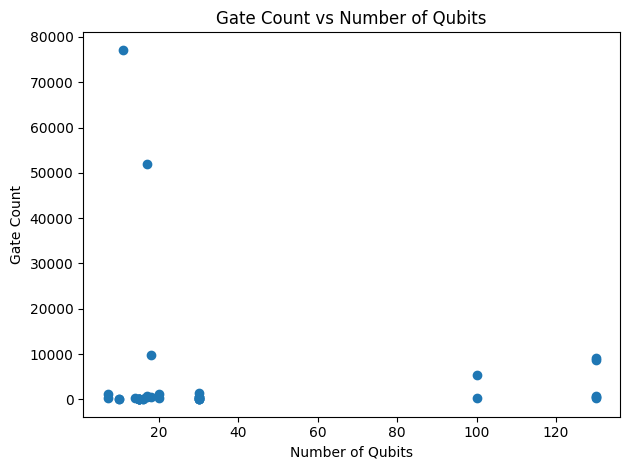

In [10]:
plt.figure()
plt.scatter(df["n_qubits"], df["gate_count"])
plt.xlabel("Number of Qubits")
plt.ylabel("Gate Count")
plt.title("Gate Count vs Number of Qubits")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

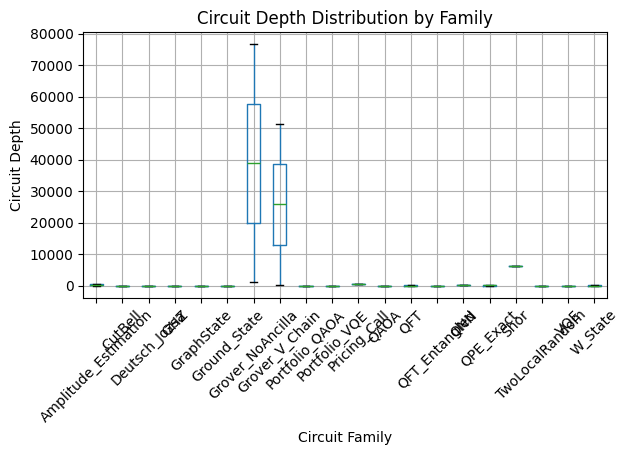

In [12]:
plt.figure()
df.boxplot(column="depth", by="family", rot=45)
plt.xlabel("Circuit Family")
plt.ylabel("Circuit Depth")
plt.title("Circuit Depth Distribution by Family")
plt.suptitle("")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

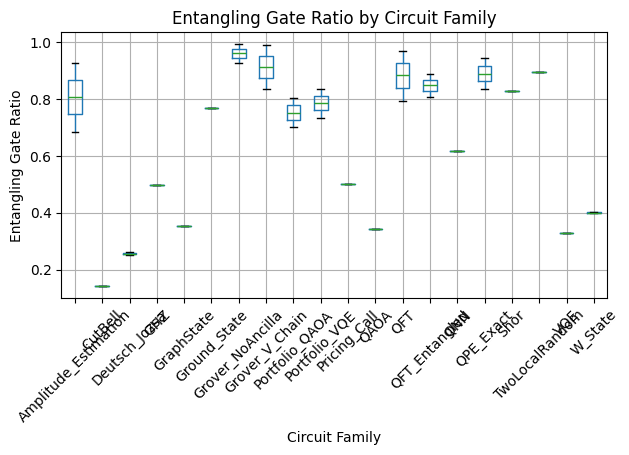

In [13]:
plt.figure()
df.boxplot(column="entangling_ratio", by="family", rot=45)
plt.xlabel("Circuit Family")
plt.ylabel("Entangling Gate Ratio")
plt.title("Entangling Gate Ratio by Circuit Family")
plt.suptitle("")
plt.tight_layout()
plt.show()


In [14]:
print(df.describe())
print(df.groupby("family")[["gate_count", "depth", "entangling_ratio"]].mean())


         n_qubits    gate_count         depth  entangling_ratio
count   36.000000     36.000000     36.000000         36.000000
mean    38.833333   4817.305556   3877.638889          0.648216
std     42.157189  15232.440573  15151.140840          0.255577
min      7.000000     30.000000      3.000000          0.142857
25%     15.000000    135.750000     31.750000          0.402423
50%     18.000000    311.500000     72.500000          0.718850
75%     30.000000    808.250000    261.000000          0.849494
max    130.000000  77172.000000  76677.000000          0.993249
                        gate_count         depth  entangling_ratio
family                                                            
Amplitude_Estimation   4733.500000    444.000000          0.807879
CutBell                  42.000000      3.000000          0.142857
Deutsch_Jozsa           230.333333     60.333333          0.257006
GHZ                     137.500000     69.750000          0.500000
GraphState            

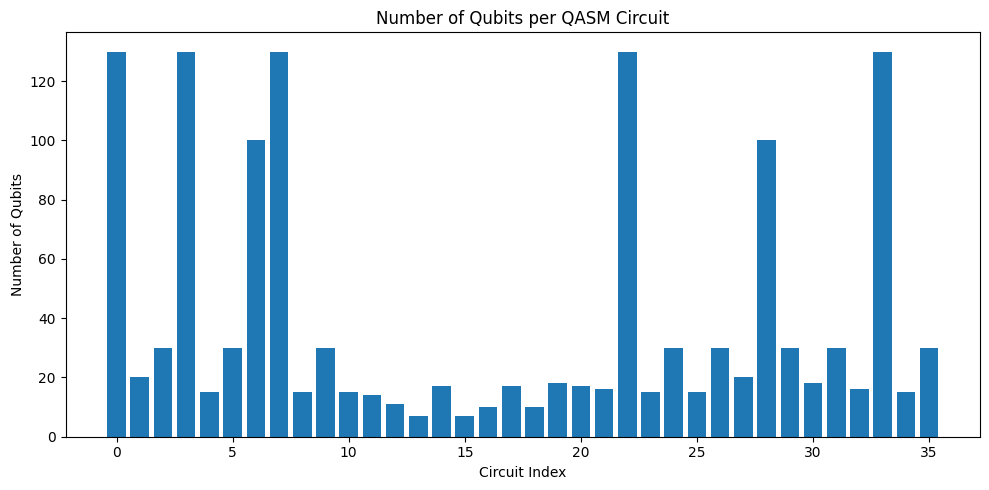

In [1]:
import os
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

QASM_DIR = "./circuits"

circuit_names = []
num_qubits = []

for fname in sorted(os.listdir(QASM_DIR)):
    if not fname.endswith(".qasm"):
        continue

    path = os.path.join(QASM_DIR, fname)

    try:
        qc = QuantumCircuit.from_qasm_file(path)
        circuit_names.append(fname)
        num_qubits.append(qc.num_qubits)
    except Exception as e:
        print(f"Failed to load {fname}: {e}")

plt.figure(figsize=(10, 5))
plt.bar(range(len(num_qubits)), num_qubits)
plt.xlabel("Circuit Index")
plt.ylabel("Number of Qubits")
plt.title("Number of Qubits per QASM Circuit")
plt.tight_layout()
plt.show()